# The Application of Magnetic Susceptibility Separation for Measuring

Cerebral Oxygenation in Preterm Neonates

Thomas Gavin Carmichael [](https://orcid.org/0009-0008-6849-5333) (The University of British Columbia, The University of British Columbia)  
Alexander Rauscher [](https://orcid.org/0000-0002-1961-8252) (The University of British Columbia)  
Ruth E Grunau [](https://orcid.org/0000-0002-5428-9212) (The University of British Columbia, The University of British Columbia)  
Alexander Mark Weber [](https://orcid.org/0000-0001-7295-0775) (The University of British Columbia, The University of British Columbia)  
June 11, 2024

**Background**: Quantitative susceptibility mapping (QSM) is a magnetic resonance imaging (MRI) modality proposed to be a viable method of measuring cerebral oxygenation in neonates given its sensitivity to deoxyhemoglobin, a paramagnetic molecule. During QSM, however, paramagnetic sources can be obscured by opposing diamagnetic sources such as water and myelin. We sought to evaluate whether QSM images alone, or an algorithm that attempts to isolate their paramagnetic components, are more accurate in measuring oxygenation of the major cerebral veins in a cohort of neonates born preterm. Additionally, we aimed to determine whether a difference in oxygenation existed between the major cerebral veins.

**Methods**: 19 neonates born preterm were scanned on a 3T research MRI at term equivalent age. The protocol included a multi-echo susceptibility-weighted imaging sequence. The acquired imaging data were processed as QSM images to obtain the susceptibility values of the superior sagittal sinus (SSS) and central cerebral veins (CCV). These values were used to calculate the oxygen saturation (SvO<sub>2</sub>) of the SSS and CCV. QSM images were subsequently processed to isolate their paramagnetic components. SvO<sub>2</sub> values of the SSS and CCV were calculated again from the paramagnetic components.

**Results**: The mean SvO<sub>2</sub> values of the SSS and CCV calculated from QSM images were found to be 72.4% (SD, 3.4%) and 68.7% (SD, 3.5%), respectively. The mean SvO<sub>2</sub> values calculated from paramagnetic components were found to be 58.1% (SD, 7.3%) for the SSS and 57.7% (SD, 7.0%) for the CCV.

**Conclusion**: SSS SvO<sub>2</sub> values derived from paramagnetic components agreed well with the existing literature and were closer than the values derived from QSM, however, they displayed greater variability. Although the CCV SvO<sub>2</sub> data from QSM aligns more closely with existing literature, it is important to note that the current literature on this topic remains relatively limited in the CCV. Thus, decomposing QSM images into paramagnetic components shows great promise as a method for more accurately measuring cerebral oxygenation in neonates but may require more research to improve precision. Notably, no significant difference in oxygenation was observed between the CCV and the SSS, contrasting with previous studies.

In [ ]:
# options
knitr::opts_chunk$set(
  # fig.width=8, fig.height=5, 
  # out.width="50%",
  # fig.align="center",
  echo=FALSE, 
  message=FALSE, 
  warning=FALSE
  # cache=TRUE 
  )
set.seed(1234) # reproducible
options(knitr.kable.NA = '') # how kable handles NA
options(reticulate.repl.quiet = TRUE)

In [ ]:
#libraries
library(tidyverse) # ggplot2, dplyr, tidyr, readr, purrr, tibble, stringr, forcats

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

Loading required package: gmp


Attaching package: 'gmp'

The following objects are masked from 'package:base':

    %*%, apply, crossprod, matrix, tcrossprod

C code of R package 'Rmpfr': GMP using 64 bits per limb


Attaching package: 'Rmpfr'

The following object is masked from 'package:gmp':

    outer

The following objects are masked from 'package:stats':

    dbinom, dgamma, dnbinom, dnorm, dpois, dt, pnorm

The following objects are masked from 'package:base':

    cbind, pmax, pmin, rbind

In [ ]:
load("notebooks/results.RData")

In [ ]:
rndmean <- function(clm) {
  return(round(mean(clm),2))
}
rndsd <- function(clm) {
  return(round(sd(clm),2))
}

# Introduction

Preterm birth

Abnormal brain development is a significant concern for parents with children born preterm, as 43% of infants that survive will have neurodevelopmental delays later in life ([Dix, van Bel, and Lemmers 2017](#ref-dixMonitoringCerebralOxygenation2017)). Irregularities in early cerebral oxygen levels have been identified as a potential source of such delays, where too little oxygen provided during NICU care can result in white matter injury, while too much oxygen can result in reduced cortical connectivity ([Rantakari et al. 2021](#ref-rantakariEarlyOxygenLevels2021)). As such, being able to precisely, accurately, and non-invasively measure cerebral oxygenation is necessary for understanding and improving neurodevelopmental outcomes in preterm neonates.

In the present study, we set out to determine whether a QSM image alone, or the paramagnetic component of the QSM image, is more accurate in measuring the oxygen present in the major cerebral veins of a cohort of preterm neonates. As previous QSM studies have not included the SSS, we also had a secondary aim of preserving this vessel in our QSM images and using this data to determine whether a difference in oxygenation existed between the SSS and the central cerebral veins (CCV).

# Methods

The study was approved by the Clinical Research Ethics Board at the University of British Columbia and Children’s & Women’s Hospital (H21-00655) and written informed consent was obtained from the parent/guardian for each infant.

## Study population

Participant data comes from a previous study ([Zhu et al. 2024](#ref-zhu-etal-cmro2)). Participants consisted of preterm neonates born between 25- and 31-weeks gestational age (GA) who were admitted to the level III NICU at BC Women’s Hospital. Recruitment took place over a span of one year, from February 2021 to January 2022, facilitated by a dedicated research nurse. Parents of eligible infants were approached by the research nurse prior to discharge from the NICU to explain the study objectives and seek their consent for participation. Infants meeting the criteria for inclusion were scanned for the study if they had already been discharged from the NICU, were in stable condition, and had reached a term equivalent age of 37 to 44 weeks GA. However, certain exclusion criteria were applied to ensure the homogeneity and integrity of the study sample. Infants were excluded if there was clinical evidence of a congenital malformation or syndrome, a TORCH infection, or ultrasound evidence of large parenchymal hemorrhagic infarction (\>2 cm, Grade 4 intraventricular hemorrhage).

## Image acquisition

MR imaging was performed on a 3.0 Tesla General Electric Discovery MR750 scanner (scanner software version DV26.0_R03) equipped with a SREE Medical Systems single-channel neonatal head coil (<a href="#tbl-mri" class="quarto-xref">Table 1</a>). The scans were conducted at the BC Children’s MRI Research Facility. Prior to the scanning procedure, subjects were carefully prepared by a research nurse. Swaddling and feeding were used to ensure the comfort and cooperation of the subjects during the scan. Importantly, no sedatives or invasive markers were utilized throughout the procedure. Subjects were placed within a specially designed SREE Medical Systems MRI compatible incubator, which facilitated both safety and motion minimization. Molded foam was strategically positioned around the head and body within the incubator to further restrict subject movement. To protect against potential hearing damage, ear plugs were employed during the scanning process. Additionally, a pulse oximeter was affixed to the subject’s foot to monitor arterial oxygen saturation and heart rate throughout the scan.

|                        | T1w          | T2w          | pcASL         | SWI           |
|:-----------------------|:-------------|:-------------|:--------------|:--------------|
| Sequence               | 3D FSPGR     | 3D CUBE      |               |               |
| spin-echo              |              |              |               |               |
| flow-compensated       |              |              |               |               |
|                        |              |              |               |               |
| direction              | Coronal      | Sagittal     | Axial         | Axial         |
| TR (ms)                | 7.74         | 2,300        | 4,680         | 30.9          |
| TE (ms)                | 2.97         | 66.29        | 10.55         | 5.24          |
| Flip angle             | 12$^{\circ}$ | 90$^{\circ}$ | 111$^{\circ}$ | 20$^{\circ}$  |
| FOV (cm)               | 20           | 20           | 24            | 25            |
| Acquisition matrix     | 512 x 512    | 256 x 256    | 128 x 128     | 256 x 256     |
|                        |              |              |               |               |
| \(mm\)                 | 0.39 x 0.39  | 0.78 x 0.78  | 1.875 x 1.875 | 0.977 x 0.977 |
|                        |              |              |               |               |
| \(mm\)                 | 1            | 1            | 4             |               |
| to 1 with zero         |              |              |               |               |
| filling (ZIP2)         |              |              |               |               |
| Number of slices       | 126          | 106          | 50            | 92            |
| Additional parameters  | n/a          | n/a          |               |               |
| 2,025 ms pulse label;  |              |              |               |               |
| 24 control-label pairs | n/a          |              |               |               |
| Scan duration          | 4 min 39 s   | 5 min 1 s    | 5 min 26 s    | 5 min 29 s    |
|                        |              |              |               |               |

Table 1: Technical parameters for MR imaging pulse sequences

The MRI scan protocol comprised of the following sequences: a T1-weighted scan, a T2-weighted scan, a pseudo-continuous arterial spin labeling (ASL) scan, a multi-echo susceptibility-weighted imaging scan, and a diffusion-weighted imaging (DWI) spin-echo echo planar imaging (EPI) sequence. The DWI sequence was not used for the present study.

## Image analysis

The raw DICOM files acquired from the scanning procedure were converted to NIfTI (Neuroimaging Informatics Technology Initiative) format using Chris Rorden’s `dcmniix` tool. SWI magnitude data files were then used to create subject-specific brain masks that would not erode the SSS during QSM processing, an issue faced by our group in the past ([X. Li et al. 2016](#ref-liFirstStepNeuroimaging2016)). A step-by-step summary of the pipeline used is shown in <a href="#fig-sample" class="quarto-xref">Figure 2</a>.

``` python
# Create a new graph
graph = graphviz.Graph(engine='neato')

# Add nodes with text and images
#graph.node('A', 'NifTI image file', shape='box', pos='0,0!')

resized_mag5_path = resize_image_to_png(figpath + magechofive_path, 30, figpath + "initialmag5_resized")
node_a_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{resized_mag5_path}" /></TD></TR><TR><TD ALIGN="CENTER">SWI magnitude, 5th echo</TD></TR></TABLE>>'
graph.node('A', label=node_a_label, shape='none', pos='0,0!')

graph.node('B', 'Create initial \nbrain mask', shape='ellipse', pos='2.5,0!')
graph.node('1', f'<<b>1</b>>', shape='none', pos='1.5,.3!')

resized_mask_path = resize_image_to_png(figpath + initialmask_path, 30, figpath + "initialmask_resized")
node_c_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{resized_mask_path}" /></TD></TR><TR><TD ALIGN="CENTER">Brain mask</TD></TR></TABLE>>'
graph.node('C', label=node_c_label, shape='none', pos='5,0!')

graph.node('D', 'Dilate', shape='ellipse', pos='6.7,0!')
graph.node('2', f'<<b>2</b>>', shape='none', pos='6.3,.3!')

dilmaskresized_image_path = resize_image_to_png(figpath + dilatedmask_path, 30, figpath + "dilmask_resized")
node_e_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{dilmaskresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">Dilated brain mask</TD></TR></TABLE>>'
graph.node('E', label=node_e_label, shape='none', pos='8.5,0!')

graph.node('F', 'Calculate QSM with \ndilated mask', shape='ellipse', pos='8.5,-1.7!')
graph.node('3', f'<<b>3</b>>', shape='none', pos='7.3,-1.3!')

dilchiresized_image_path = resize_image_to_png(figpath + chidil_path, 30, figpath + 'dilchi_resized')
node_e_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{dilchiresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">Dilated QSM image</TD></TR></TABLE>>'
graph.node('G', label=node_e_label, shape='none', pos='8.5,-3.4!')

graph.node('H', 'SSS segmentation',  shape='ellipse', pos='8.5,-5!')
graph.node('4', f'<<b>4</b>>', shape='none', pos='7.3,-4.75!')

sssmaskresized_image_path = resize_image_to_png(figpath + sssmask_path, 30, figpath + 'sssmask_resized')
node_i_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{sssmaskresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">SSS mask</TD></TR></TABLE>>'
graph.node('I', label=node_i_label, shape='none', pos='5,-5!')

graph.node('J', 'Combine masks',  shape='ellipse', pos='5,-2.5!')
graph.node('5', f'<<b>5</b>>', shape='none', pos='4.2,-2.2!')

finalmaskresized_image_path = resize_image_to_png(figpath + finalmask_name, 30, figpath + 'finalmask_resized')
node_k_label = f'<<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="1" CELLSPACING="0"><TR><TD><IMG SRC="{finalmaskresized_image_path}"/></TD></TR><TR><TD ALIGN="CENTER">Final mask with SSS</TD></TR></TABLE>>'
graph.node('K', label=node_k_label, shape='none', pos='2,-2.5!')

# Add edges between nodes
graph.edge('A', 'B', label='', constraint='false')
graph.edge('B', 'C', dir='forward', label='', constraint='false')
graph.edge('C', 'D', label='', constraint='false')
graph.edge('D', 'E', dir='forward', label='', constraint='false')
graph.edge('E', 'F',  label='', constraint='false')
graph.edge('F', 'G', dir='forward', label='', constraint='false')
graph.edge('G', 'H',  label='', constraint='false')
graph.edge('C', 'J',  label='', constraint='false')
graph.edge('I', 'J',  label='', constraint='false')
graph.edge('H', 'I', dir='forward', label='', constraint='false')
graph.edge('J', 'K', dir='forward', label='', constraint='false')

# Attributes
graph.attr(dpi='300', bgcolor='white', forcelabels='true')

# Render the graph
graph.render(figpath + 'example_graph', format='png', engine='neato', cleanup=True)

from IPython.display import Image as Ipmage
from IPython.display import display
from io import BytesIO

# Render the graph to a BytesIO object
png_bytes = graph.pipe(format='png')

# Display the graph using IPython.display
display(Ipmage(png_bytes))
```

<figure id="fig-graph">
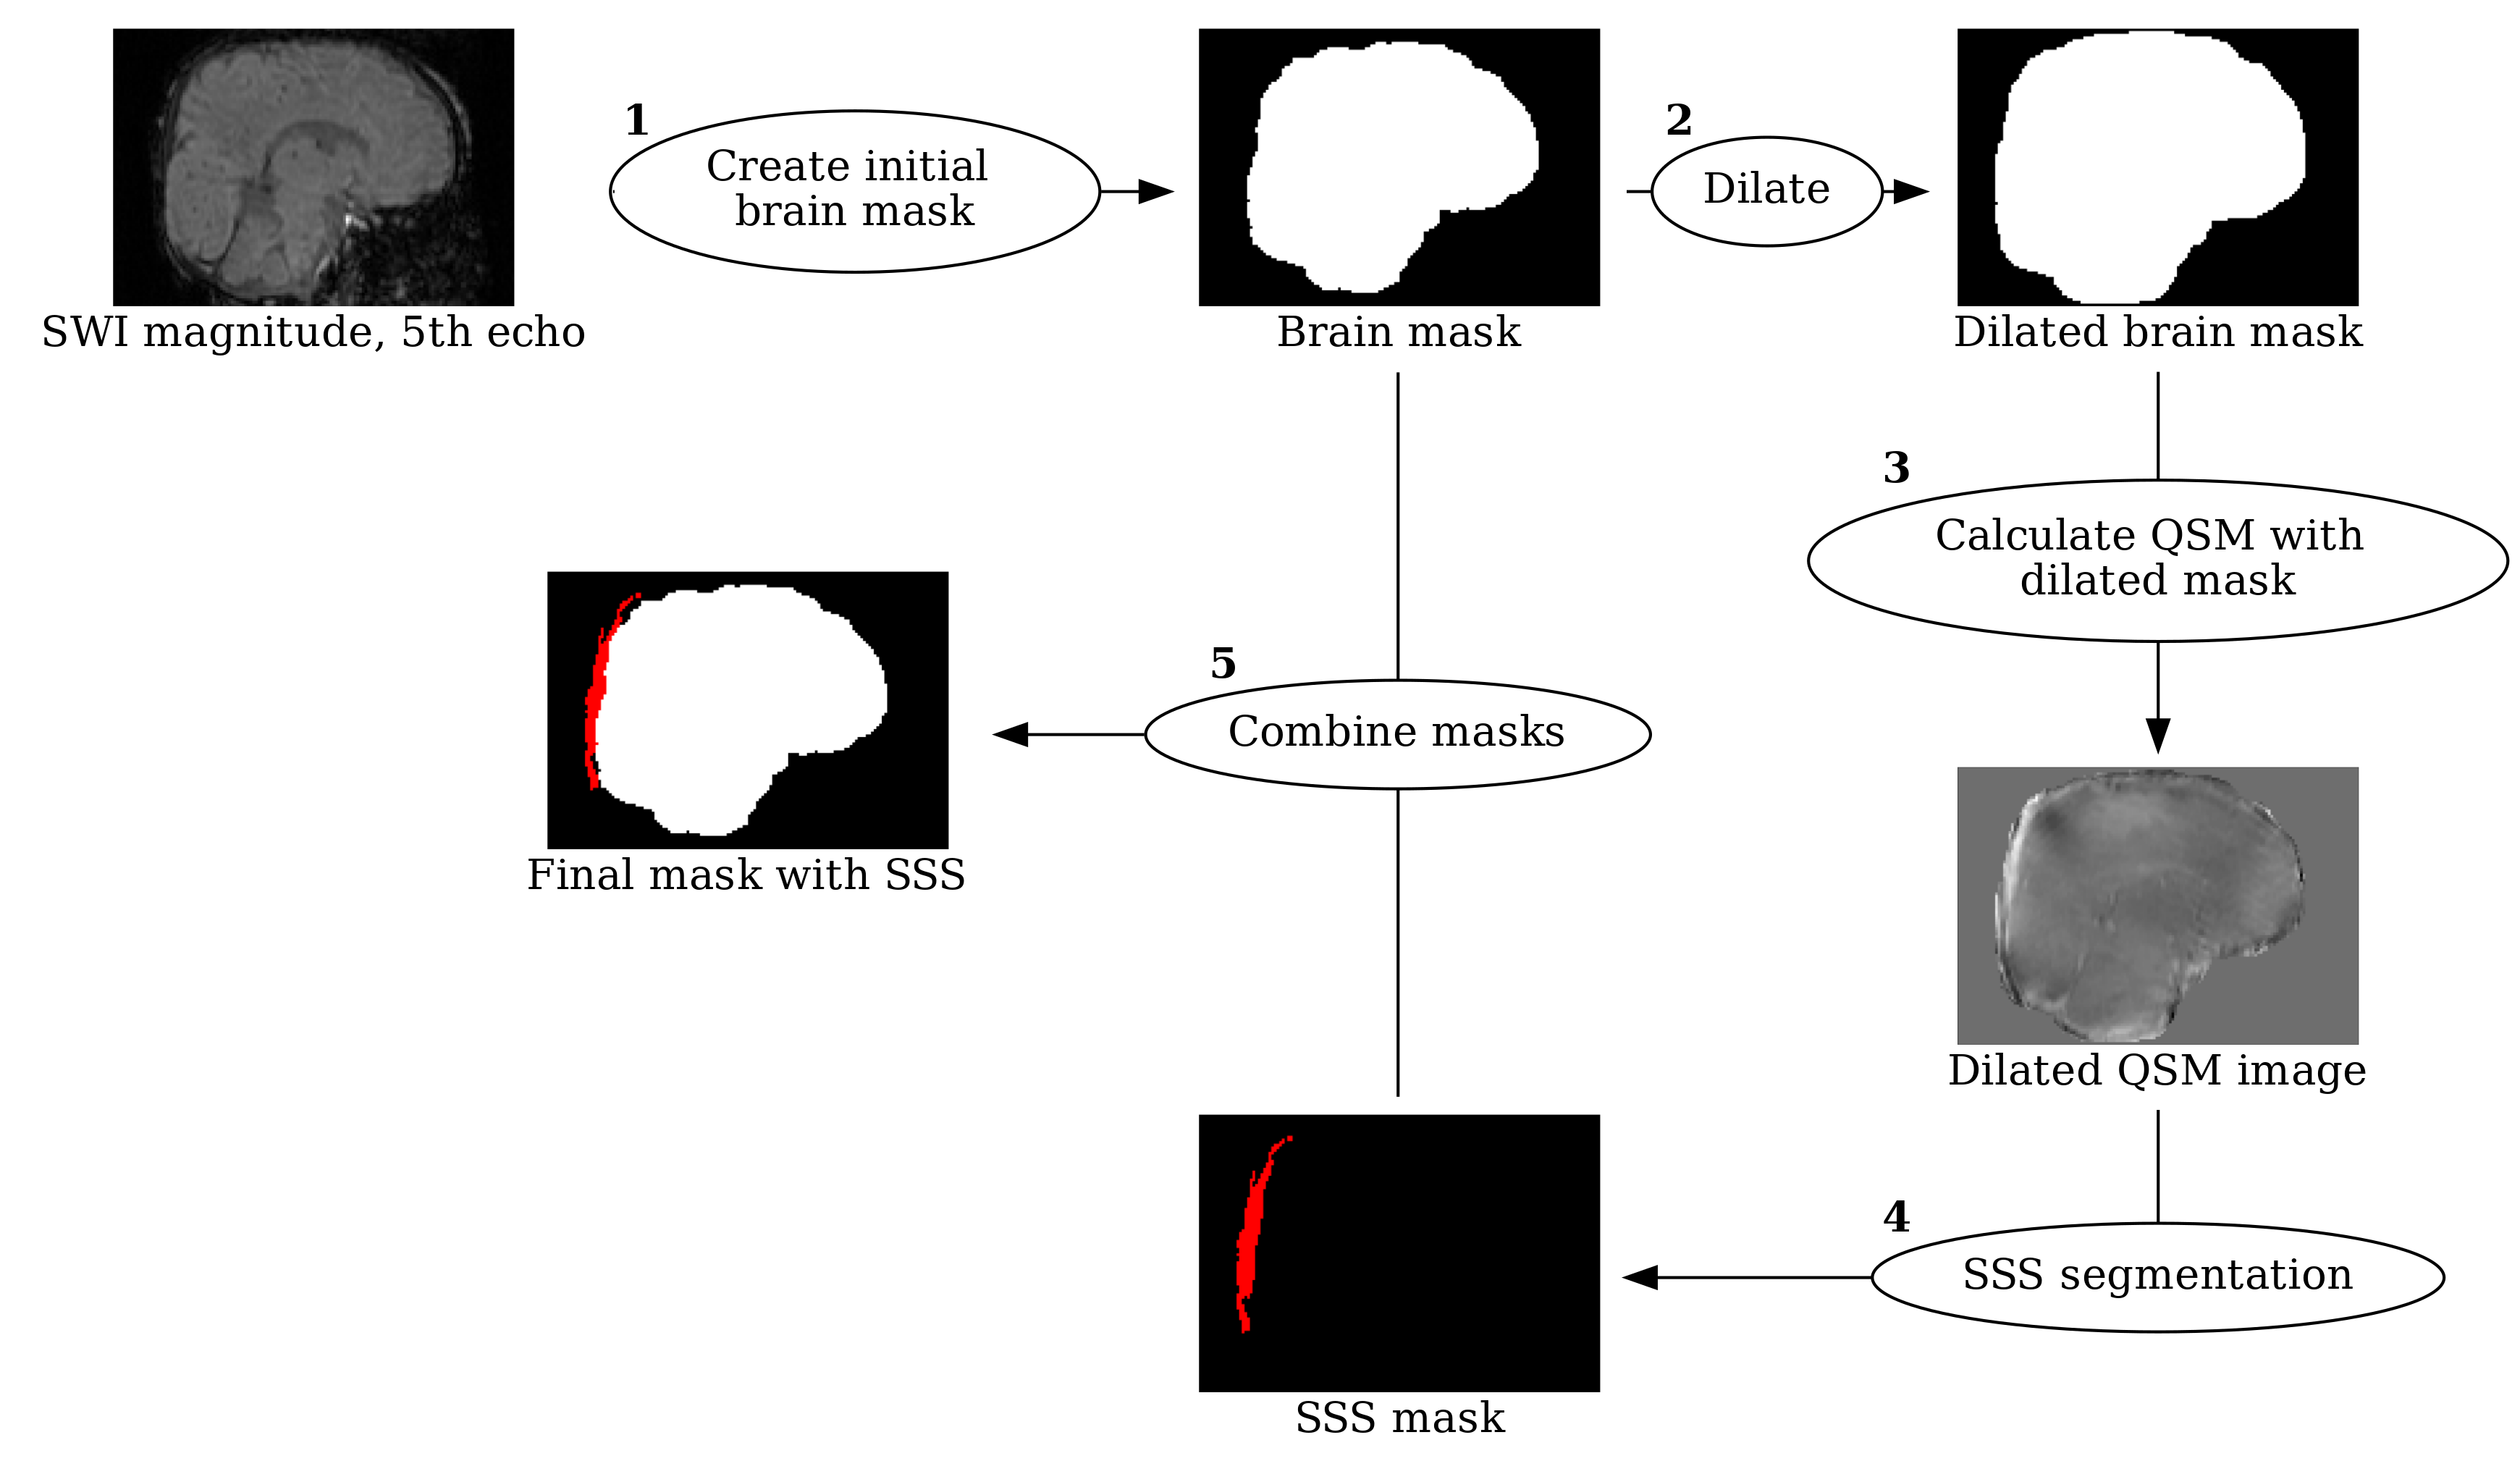
<figcaption>Figure 1: Pipeline for generating subject-specific brain masks that include the superior sagittal sinus (SSS). Initial steps involved (1) creating brain a mask from the magnitude of the fifth echo of the susceptibility weighted scan. Subsequently, the brain mask is dilated and then (2) utilized in conjunction with a quantitative susceptibility mapping (QSM) script to generate a preliminary QSM image. Further refinement involved (3) segmenting the SSS from the QSM image manually to create a tissue mask of the SSS region. Finally, (4) the vascular mask of the SSS is integrated with the initial brain mask, forming the comprehensive brain mask essential for obtaining susceptibility data that includes the SSS.</figcaption>
</figure>

First, the fifth echo SWI magnitude file was processed using FSL’s (v. 6.0.7.3) ([Woolrich et al. 2009](#ref-woolrichBayesianAnalysisNeuroimaging2009)) `fslroi`, `fslmaths`, and `bet` ([Smith 2002](#ref-smithFastRobustAutomated2002)) to create a preliminary brain mask, similar to our previous efforts, which does not contain the SSS. `Fslroi` was used to isolate the fifth echo of the magnitude data, which was then squared using Fslmaths and the option `-sqr`. Squaring the magnitude image was found to dramatically improve subsequent brain extraction. The resulting image was then used to create the preliminary brain mask using bet with the options `-m` and `-R`. The former flag generated a binary brain mask, while the latter performed a more robust brain centre estimation. The brain mask was then dilated by 7 voxels using `Fslmaths` and the options `-kernel boxv` and `-dilM` in order for the dilated mask to contain the SSS (along with unwanted tissue as well). This mask was then used, along with the phase images, in a MATLAB script for QSM calculation from Christian Kames ([Kames, Wiggermann, and Rauscher 2018](#ref-kamesRapidTwostepDipole2018)) to produce a preliminary QSM image that contained the SSS, albeit with fairly low signal-to-noise ratio and other unwanted tissue. Given the high contrast in voxel intensity between the SSS and surrounding tissue, the select by intensity tool in `FSLeyes` ([McCarthy 2023](#ref-mccarthyFSLeyes2023)) was then used to segment the SSS from the QSM image and create a 3D mask of the selected region. Using `fslmaths` and the options `-add` and `-bin`, the SSS mask was then combined with the original brain mask of the fifth echo. This resulted in a brain mask that contained only brain and SSS signal. Finally, this mask was used in a final QSM post-processing step to create a QSM image that includes the SSS while maintaining a high signal-to-noise ratio, making it suitable to obtain accurate susceptibility values.

STI Suite (v. 3.0) ([W. Li et al. 2014](#ref-liIntegratedLaplacianBased2014)), was used to process the final QSM images as it produced the cleanest images without eroding the SSS. The finalized brain mask and the last three echoes of the magnitude and phase images were used in STI Suite along with the following parameters: 0.9766 x 0.9766 x 1 mm<sup>3</sup> voxel size, 5 ms TE1, 5.3 ms $\Delta$TE, and 77.4 ms sum TE, B0 strength = 3, and B0 direction = \[0, 0, 1\]. The 3D GRE data option was selected for the phase processing stage, and STAR-QSM was selected for the QSM stage. Finally, the \`select by intensity’ tool in `FSLeyes` was then used to semi-automatically make vascular masks of the SSS and CCV from each subject’s QSM image. The vascular masks were used to calculate the mean susceptibility of each subject’s SSS and CCV from their QSM image with `fslstats`.

To isolate the paramagnetic component of subjects’ QSM data, the $\chi$-separation toolbox ([Shin et al. 2021](#ref-shinHseparationMagneticSusceptibility2021)) from the Laboratory for Imaging Science and Technology was used. Each subject’s magnitude and phase SWI data were used along with the following parameters: 0.9766 x 0.9766 x 1 mm<sup>3</sup> voxel size; TE (s) = \[0.005, 0.0102, 0.0155, 0.0207, 0.026\]; delta TE (s) = 0.0052; B0 strength = 3; B0 direction = \[0, 0, 1\]. The mean susceptibility of each subject’s SSS and CCV in their paramagnetic maps was calculated with the same vascular masks used for the QSM images. Sample images showing the magnitude, final QSM, and final paramagnetic component images are shown in <a href="#fig-sample" class="quarto-xref">Figure 2</a>.

``` python
cut_coords_qsm = (64,42,51)

# Set the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 1

figsize=(10, 12)
fig = plt.figure(figsize=figsize)
gs = fig.add_gridspec(nrows=num_rows, ncols=num_cols, height_ratios=[1, 1, 1])
# Add subplots based on gridspec
ax1 = fig.add_subplot(gs[0,0])  # First subplot (top row)
ax2 = fig.add_subplot(gs[1,0])  # Second subplot (bottom row)
ax3 = fig.add_subplot(gs[2,0])  # Third subplot (bottom row, first column)

vmin, vmax = np.percentile(mag.get_fdata(), (2, 99.9))
plotting.plot_anat(anat_img=mag,
                      black_bg = False,
                      draw_cross=False, 
                      vmin=vmin, vmax=vmax, 
                      annotate=True, axes=ax1,
                  colorbar = False,
                  )

plotting.plot_anat(anat_img=qsm,
                   black_bg = False,
                      draw_cross=False, 
                      vmin=-0.2, vmax=0.2, 
                      annotate=True, axes=ax2,
                   colorbar= True,
                   cut_coords=cut_coords_qsm
                  )

plotting.plot_anat(anat_img=parachi,
                   black_bg = False,
                      draw_cross=False, 
                      vmin=0, vmax=0.2, 
                      annotate=True, axes=ax3,
                   colorbar= True,
                   cut_coords=cut_coords_qsm
                  )
fontsize=16
xoffset=-0.05
yoffset=1.05
# Add label "A" to the first subplot
ax1.text(xoffset, yoffset, 'A', transform=ax1.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right')

ax2.text(xoffset, yoffset, 'B', transform=ax2.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right')

ax3.text(xoffset, yoffset, 'C', transform=ax3.transAxes,
         fontsize=fontsize, fontweight='bold', va='top', ha='right') 

plt.savefig(figpath + "SampleImages.png", dpi=300, bbox_inches="tight")

plt.show()
```

<figure id="fig-sample">
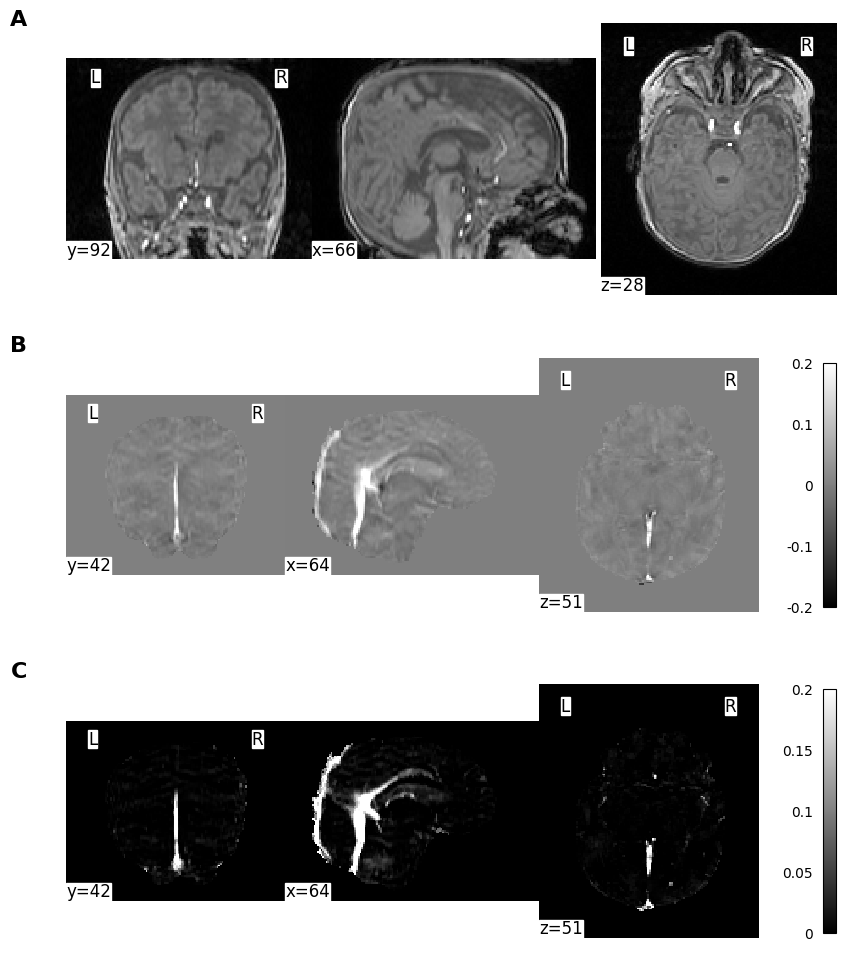
<figcaption>Figure 2: An example of subject imaging data. A sample sagittal, coronal, and axial slice is displayed for each image. (a) The 1st echo of the magnitude susceptibility weighted imaging sequence; (b) the final quantitative susceptibility mapping image; and (c) the paramagnetic component isolated from the quantitative susceptibility map. The bars in (b) and (c) indicates the range of susceptibility <span class="math inline">\(\chi\)</span> values.</figcaption>
</figure>

Once the mean susceptibility values of the SSS and CCV were obtained from the subjects’ QSM images and paramagnetic maps, venous oxygen saturation (SvO<sub>2</sub>) was calculated with the following equation ([Berg et al. 2021](#ref-bergInvestigatingEffectFlow2021)):

<span id="eq-svo">$$
SvO_{2} = 1 - \frac{\Delta \chi _{blood} - (\Delta \chi _{oxy} * Hct)}{\Delta \chi _{do} * Hct}
 \qquad(1)$$</span>

where $\Delta \chi _{blood}$ is the vessel’s measured susceptibility, $\Delta \chi _{oxy}$ is the constant representing the susceptibility changes of oxygenated blood relation to water, $\Delta \chi _{do}$ is the difference in susceptibility between oxygenated and deoxygenated blood, and Hct is the subject’s hematocrit. $\Delta \chi _{oxy}$ was -0.21 \* 4$\pi$ ppm as per Portnoy et al. ([2018](#ref-portnoyHumanUmbilicalCord2018)) and ([Sedlacik, Rauscher, and Reichenbach 2007](#ref-sedlacikObtainingBloodOxygenation2007)), while $\Delta \chi _{do}$ was -0.03 \* 4$\pi$ ppm as per ([Weisskoff and Kiihne 1992](#ref-weisskoffMRISusceptometryImagebased1992)). Subjects’ Hct for the day of the scan was calculated using a four-parameter Weibull function with previously measured values while still in the NICU.

## Statistical analysis

Statistical analysis of the acquired data was performed using R and RStudio (v. 2023.09.1 Build 494) ([R Core Team 2022](#ref-rcoreteamLanguageEnvironmentStatistical2022); [RStudio Team, n.d.](#ref-rstudioteamRStudioIntegratedDevelopment)). Mean and standard deviation values are reported for most statistics, unless specified otherwise. A paired Student’s t-test was used to determine statistical significance (p \<0.05) between two parameters (e.g. $\chi$ values between venous structures).

# Results

A total sample size of 19 infants were scanned, with a mean ($\pm$ standard deviation) gestational age of 28.8 $\pm$ 1.68 weeks and a mean birth weight of 1276.05 $\pm$ 294.87 grams. A comprehensive summary of neonatal characteristics, including additional demographic and clinical data, is provided in <a href="#tbl-dem" class="quarto-xref">Table 2</a> for reference.

| Variable | Subject Data (n=19) |
|:---|:---|
| Gestational age, weeks (mean $\pm$ SD) | 28.8 $\pm$ 1.68 |
| Corrected gestational age on scan day, weeks (mean $\pm$ SD) | 40.36 $\pm$ 1.4 |
| Number of male neonates ( Birth weight, g (mean $\pm$ SD) | 1276.05 $\pm$ 294.87 |
| Weight on scan day, g (mean $\pm$ SD) | 3396.58 $\pm$ 597.72 |
| Days spent in NICU (median, IQR) | 53, 23 |
| Days on ventilation (median, IQR) | 31, 28.5 |
|  |  |

Table 2: Demographic and clinical characteristic of the study sample.

The mean SvO<sub>2</sub> values for the SSS and the CCV were found to be 0.72 $\pm$ 0.03 and 0.69 $\pm$ 0.03 ppm, respectively, when determined from the QSM data. When determined from the paramagnetic map, the mean SvO<sub>2</sub> values for the SSS and the CCV were found to be 0.58 $\pm$ 0.07 %, respectively. A summary of the measured physiological parameters, including the chi values used to calculate SvO<sub>2</sub>, can found in <a href="#tbl-chistats" class="quarto-xref">Table 3</a>.

|        |              |        |       |          |              |
|:-------|:-------------|:-------|:------|:---------|:-------------|
| Region | Measure      | QSM    |       |          |              |
| map    | p-value      | 95% CI |       |          |              |
| SSS    | Chi (ppm)    | 0.1    | 0.21  | 2.84^-11 | -0.13, -0.09 |
|        | SvO$_{2}$(%) | 72.46  | 58.14 | 6.12^-10 | 11.78, 16.85 |
| CCV    | Chi (ppm)    | 0.13   | 0.22  | 6.25^-9  | -0.1, -0.07  |
|        | SvO$_{2}$(%) | 68.71  | 57.69 | 2.16^-9  | 8.9, 13.13   |
|        |              |        |       |          |              |

Table 3: Summary of acquired physiological parameters. Mean ± SD is shown for chi and SvO<sub>2</sub> values. The P-value and 95% confidence interval (CI) were obtained through the comparison of values between QSM and paramagnetic maps; (n=19).

Region-specific $\chi$ and SvO<sub>2</sub> values acquired from QSM were compared to values acquired from paramagnetic maps. In both the SSS and CCV, it was found that a significant difference existed between values acquired ($\chi$ and SvO<sub>2</sub>) from QSM and paramagnetic maps (p \< 0.05). A boxplot showing the comparisons made is shown in <a href="#fig-methodplot" class="quarto-xref">Figure 3</a>.

``` python
patch1
```

<figure id="fig-methodplot">
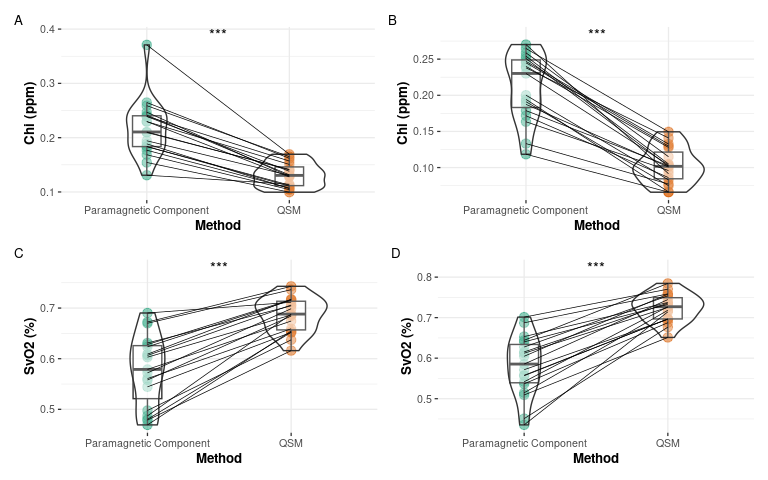
<figcaption>Figure 3: Vein-specific susceptibility and oxygen saturation values by method. (A, B) contains violin plots comparing subject χ (ppm) acquired from QSM (A) and its paramagnetic component (B); (C, D) contains violin plots comparing subject SvO2 (%) acquired from QSM (C) and its paramagnetic component (D). Raw data points from paramagnetic maps are shown as filled green circles and raw data points from QSM are shown as filled orange circles. Each line connects the raw data points of a single subject. (***) indicates P&lt;0.05.</figcaption>
</figure>

The acquired $\chi$ and SvO<sub>2</sub> values were additionally compared between veins. In data created from QSM, a significant difference was found between the CCV and SSS in mean $\chi$ (p \< 0.05; 95% CI \[0.017, 0.04\]) and mean SvO<sub>2</sub> (p \< 0.05; 95% CI \[-0.052, -0.023\]). In data acquired from paramagnetic maps, no significant difference was observed between the CCV and the SSS in either mean $\chi$ (p = 0.711; 95% CI \[-0.02, 0.029\]) or mean SvO<sub>2</sub> (p = 0.752; 95% CI \[-0.034, 0.029\]). A summary of these comparisons is represented in <a href="#fig-regionplot" class="quarto-xref">Figure 4</a>.

``` python
patch2
```

<figure id="fig-regionplot">
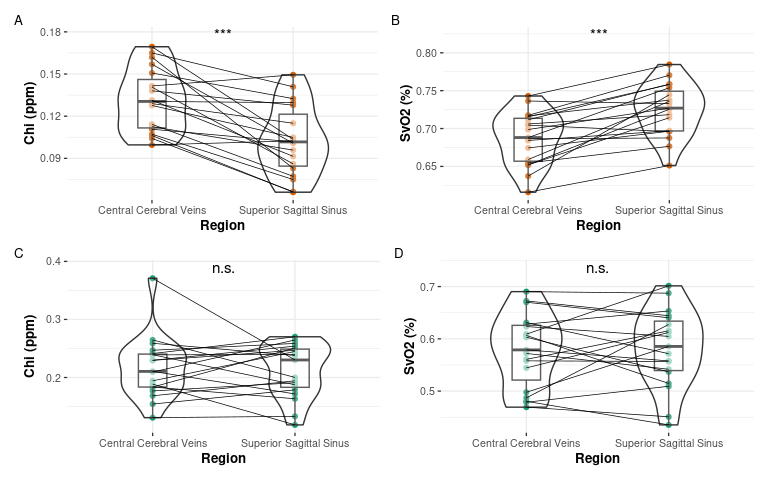
<figcaption>Figure 4: Inter-venous comparisons of susceptibility and oxygen saturation. Violin plots comparing (A, C) χ (ppm) and (B, D) SvO2 (%) between the CCV and the SSS. Panels (A) and (B) used data acquired from QSM, and its raw data points are shown as filled orange circles. Panels (C) and (D) used data acquired from paramagnetic maps, and its raw data points are shown as filled green circles. Each line connects the raw data points of a single subject. (***) indicates p&lt;0.05; (n.s.) indicates no significant difference.</figcaption>
</figure>

# Discussion

The primary objective of the present study was to assess whether the application of magnetic susceptibility separation to neonatal QSM data could provide more accurate cerebral venous vessel oxygenation measurements. To the best of our knowledge, we are the first to test this in a neonatal cohort, as susceptibility separation has been typically evaluated as a method of imaging myelin and brain iron in adult subjects ([Shin et al. 2021](#ref-shinHseparationMagneticSusceptibility2021); [Ahmed et al. 2023](#ref-ahmedDiamagneticComponentMap2023a)). Our results showed that the SvO<sub>2</sub> values of the SSS and CCV obtained from susceptibility separation are significantly lower than the respective SvO<sub>2</sub> values obtained from QSM alone. When our results were compared to the literature, we found that our SSS SvO<sub>2</sub> data from susceptibility separation agreed well with the findings of other studies measuring SvO<sub>2</sub> of the SSS in similar subject populations. Conversely, the paramagnetic CCV SvO<sub>2</sub> data saw less agreement with the existing literature than the corresponding data from QSM. However, there is reason to believe our paramagnetic CCV values may be accurate given their similarity to the paramagnetic SSS values and the limitations of the two studies that observed CCV SvO<sub>2</sub>. Additionally, it is important to note that our SvO<sub>2</sub> measurements from susceptibility separation had greater variance than our measurements from QSM, indicating a limitation that should be addressed in future research. Overall, the present work demonstrates the promise of susceptibility separation as an MRI post-processing technique that can measure the oxygenation of the cerebral veins of infant subjects, a useful marker of regional oxygen consumption in the brain.

# Conclusion

# References

Ahmed, Maruf, Jingjia Chen, Arvin Arani, Matthew L. Senjem, Petrice M. Cogswell, Clifford R. Jack, and Chunlei Liu. 2023. “The Diamagnetic Component Map from Quantitative Susceptibility Mapping (QSM) Source Separation Reveals Pathological Alteration in Alzheimer’s Disease-Driven Neurodegeneration.” *NeuroImage* 280 (October): 120357. <https://doi.org/10.1016/j.neuroimage.2023.120357>.

Berg, Ronja C., Christine Preibisch, David L. Thomas, Karin Shmueli, and Emma Biondetti. 2021. “Investigating the Effect of Flow Compensation and Quantitative Susceptibility Mapping Method on the Accuracy of Venous Susceptibility Measurement.” bioRxiv. <https://doi.org/10.1101/2021.04.14.439812>.

Dix, Laura Marie Louise, Frank van Bel, and Petra Maria Anna Lemmers. 2017. “Monitoring Cerebral Oxygenation in Neonates: An Update.” *Frontiers in Pediatrics* 5.

Kames, Christian, Vanessa Wiggermann, and Alexander Rauscher. 2018. “Rapid Two-Step Dipole Inversion for Susceptibility Mapping with Sparsity Priors.” *NeuroImage* 167 (February): 276–83. <https://doi.org/10.1016/j.neuroimage.2017.11.018>.

Li, Wei, Alexandru V. Avram, Bing Wu, Xue Xiao, and Chunlei Liu. 2014. “Integrated Laplacian-Based Phase Unwrapping and Background Phase Removal for Quantitative Susceptibility Mapping.” *NMR in Biomedicine* 27 (2): 219–27. <https://doi.org/10.1002/nbm.3056>.

Li, Xiangrui, Paul S. Morgan, John Ashburner, Jolinda Smith, and Christopher Rorden. 2016. “The First Step for Neuroimaging Data Analysis: DICOM to NIfTI Conversion.” *Journal of Neuroscience Methods* 264 (March): 47–56. <https://doi.org/10.1016/j.jneumeth.2016.03.001>.

McCarthy, Paul. 2023. “FSLeyes.” Zenodo. <https://doi.org/10.5281/zenodo.8376979>.

Portnoy, Sharon, Natasha Milligan, Mike Seed, John G. Sled, and Christopher K. Macgowan. 2018. “Human Umbilical Cord Blood Relaxation Times and Susceptibility at 3 T: Human Umbilical Cord Blood Relaxation Times and Susceptibility at 3 T.” *Magnetic Resonance in Medicine* 79 (6): 3194–3206. <https://doi.org/10.1002/mrm.26978>.

R Core Team. 2022. “R: A Language and Environment for Statistical Computing.” Vienna, Austria: R Foundation for Statistical Computing.

Rantakari, Krista, Olli-Pekka Rinta-Koski, Marjo Metsäranta, Jaakko Hollmén, Simo Särkkä, Petri Rahkonen, Aulikki Lano, et al. 2021. “Early Oxygen Levels Contribute to Brain Injury in Extremely Preterm Infants.” *Pediatric Research* 90 (1): 131–39. <https://doi.org/10.1038/s41390-021-01460-3>.

RStudio Team. n.d. “RStudio: Integrated Development Environment for R.” Boston, MA: RStudio, PBC.

Sedlacik, Jan, Alexander Rauscher, and Jürgen R. Reichenbach. 2007. “Obtaining Blood Oxygenation Levels from MR Signal Behavior in the Presence of Single Venous Vessels.” *Magnetic Resonance in Medicine* 58 (5): 1035–44. <https://doi.org/10.1002/mrm.21283>.

Shin, Hyeong-Geol, Jingu Lee, Young Hyun Yun, Seong Ho Yoo, Jinhee Jang, Se-Hong Oh, Yoonho Nam, et al. 2021. “$\chi$-Separation: Magnetic Susceptibility Source Separation Toward Iron and Myelin Mapping in the Brain.” *NeuroImage* 240 (October): 118371. <https://doi.org/10.1016/j.neuroimage.2021.118371>.

Smith, Stephen M. 2002. “Fast Robust Automated Brain Extraction.” *Human Brain Mapping* 17 (3): 143–55. <https://doi.org/10.1002/hbm.10062>.

Weisskoff, Robert M., and Suzanne Kiihne. 1992. “MRI Susceptometry: <span class="nocase">Image-based</span> Measurement of Absolute Susceptibility of MR Contrast Agents and Human Blood: COMMUNICATIONS.” *Magnetic Resonance in Medicine* 24 (2): 375–83. <https://doi.org/10.1002/mrm.1910240219>.

Woolrich, Mark W., Saad Jbabdi, Brian Patenaude, Michael Chappell, Salima Makni, Timothy Behrens, Christian Beckmann, Mark Jenkinson, and Stephen M. Smith. 2009. “Bayesian Analysis of Neuroimaging Data in FSL.” *NeuroImage* 45 (1): S173–86. <https://doi.org/10.1016/j.neuroimage.2008.10.055>.

Zhu, A., C. Chau, N. Chan, A. Chacko, L. Holsti, R. E. Grunau, and A. M. Weber. 2024. “Regional Cerebral Metabolic Rate of Oxygen and Levels of Respiratory Support in Preterm Neonates.” *Pediatric Research*, May.